In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import List

In [2]:
@dataclass
class MamdaniTrangle:
    start: float
    end: float 
    peak: float
    peak_value: float #(0,1)
    max_y: float = 1
    
    def slope(self,x):
        if x<= self.start:
            return 0
        if x>=self.end:
            return 0
        if x<=self.peak:
            return (x-self.start)/(self.peak-self.start)*self.peak_value
        return (self.end-x)/(self.end-self.peak)*self.peak_value
    
    
    def __call__(self, x):
        return min(self.slope(x), self.max_y)

    def set_x(self, x):
        self.max_y = self.slope(x)
    
            

In [3]:
mt1= MamdaniTrangle(start=1.0,end=3.0,peak=2.0,peak_value=1)
mt2= MamdaniTrangle(start=2.1,end=4.5,peak=3,peak_value=1)

rules = [mt1, mt2]

In [4]:
x = np.linspace(0,5,100)


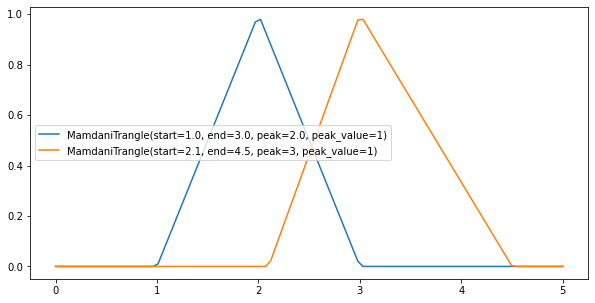

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
# fig.set_dpi(300)
for rule in rules:
    y =[rule.slope(x1) for x1 in x]
    ax.plot(x, y, label=str(rule))
plt.legend()
# ax.scatter(min_temp_norm_x, temp, color="blue")
# ax.set_yticks(range(0,18,1))
# ax.set_title("Normalizacja")

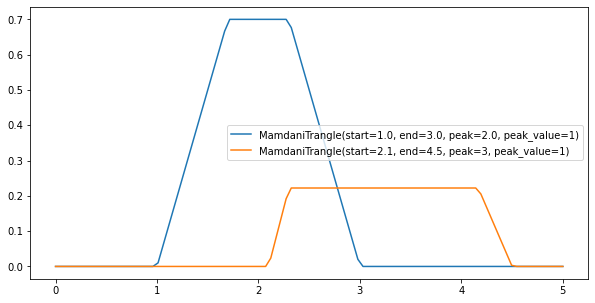

In [6]:
x_const = 2.3

for rule in rules:
    rule.set_x(x_const)
    
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
# fig.set_dpi(300)
for rule in rules:
    y =[rule(x1) for x1 in x]
    ax.plot(x, y, label=str(rule))
plt.legend()

In [7]:
def rule_sum(callables, x):
    return max([call(x) for call in callables])

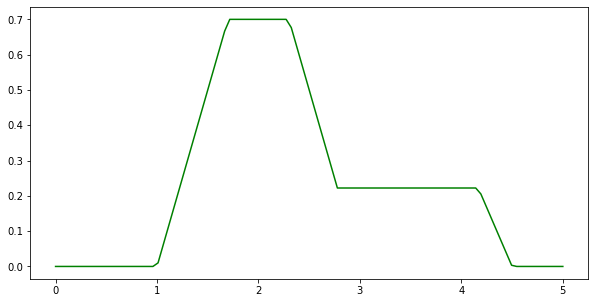

In [10]:
sum_y = [rule_sum(rules,x1) for x1 in x]

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
# fig.set_dpi(300)
ax.plot(x, sum_y, color="green")

## Average center defuzzification

In [12]:
weight_center = np.sum([rule_sum(rules,rule.peak)*rule.peak for rule in rules])/np.sum([rule_sum(rules,rule.peak) for rule in rules])
weight_center

2.2409638554216866

[None, None, None, None, None, None, None, None, None, None, None, None]

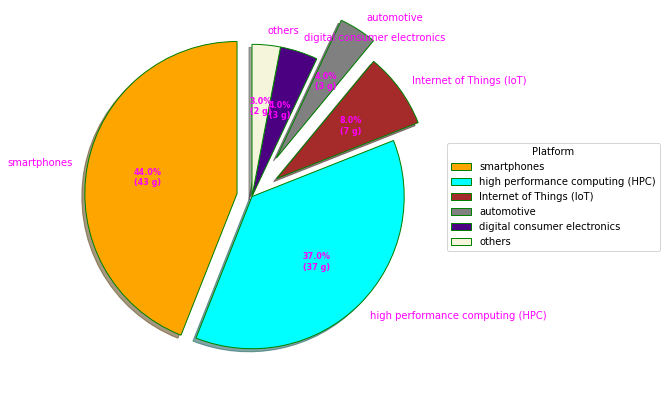

In [17]:
# Creating dataset
platform = ['smartphones',
        'high performance computing (HPC)',
        'Internet of Things (IoT)',
        "automotive",
        'digital consumer electronics',
        'others']
 
data = [44, 37, 8, 4, 4, 3]
 
 
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)
 
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, platform,
          title ="Platform",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
# ax.set_title("Net revenue by platform")